In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [115]:
t_fluxes_path_unburned = 'unburned/T_fluxes  1  1.dat'
t_water_path_unburned='unburned/water_temp  1  1f2.dat'
sal_water_path_unburned='unburned/sal_water  1  1f2.dat'
t_soil_path_unburned='unburned/soil_temp  1  1f2.dat'
layers_path_unburned='unburned/layers  1  1.dat'

t_fluxes_path_burned = 'burned/T_fluxes  1  1.dat'
t_water_path_burned='burned/water_temp  1  1f2.dat'
sal_water_path_burned='burned/sal_water  1  1f2.dat'
t_soil_path_burned='burned/soil_temp  1  1f2.dat'
layers_path_burned='burned/layers  1  1.dat'

In [116]:
twater_burned=pd.read_csv(t_water_path_burned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
twater_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 't_water']
twater_burned['datetime'] = pd.to_datetime({'Year': twater_burned['year'], 'Month': twater_burned['month'], 'Day':twater_burned['day']})

twater_unburned=pd.read_csv(t_water_path_unburned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
twater_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 't_water']
twater_unburned['datetime'] = pd.to_datetime({'Year': twater_unburned['year'], 'Month': twater_unburned['month'], 'Day':twater_unburned['day']})

In [117]:
sal_water_burned=pd.read_csv(sal_water_path_burned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
sal_water_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'sal_water']
sal_water_burned['datetime'] = pd.to_datetime({'Year': sal_water_burned['year'], 'Month': sal_water_burned['month'], 'Day':sal_water_burned['day']})

sal_water_unburned=pd.read_csv(sal_water_path_unburned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
sal_water_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'sal_water']
sal_water_unburned['datetime'] = pd.to_datetime({'Year': sal_water_unburned['year'], 'Month': sal_water_unburned['month'], 'Day':sal_water_unburned['day']})

In [140]:
tsoil_burned=pd.read_csv(t_soil_path_burned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
tsoil_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 't_soil']
tsoil_burned['datetime'] = pd.to_datetime({'Year': tsoil_burned['year'], 'Month': tsoil_burned['month'], 'Day':tsoil_burned['day']})

tsoil_unburned=pd.read_csv(t_soil_path_unburned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
tsoil_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 't_soil']
tsoil_unburned['datetime'] = pd.to_datetime({'Year': tsoil_unburned['year'], 'Month': tsoil_unburned['month'], 'Day':tsoil_unburned['day']})

In [119]:
layers_burned=pd.read_csv(layers_path_burned, delimiter=r"\s+", skiprows=19, index_col=None, header=None)
layers_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'water layer thickness, m', 
                       'W mixed layer thickness, m', 'E mixed layer thickness, m', 'S mixed layer thickness, m', 'N mixed layer thickness, m',
                       'W lower layer thickness, m', 'E lower layer thickness, m', 'S lower layer thickness, m', 'N lower layer thickness, m',
                       'ice layer thickness,   m', 'snow layer thickness,  m', 'bottom ice thickness,  m', 'reservoir volume,  m**3', 'volume deficit (accumulated),  m**3']
layers_burned['datetime'] = pd.to_datetime({'Year': layers_burned['year'], 'Month': layers_burned['month'], 'Day':layers_burned['day']})
layers_burned['mean_mixed_layer_thickness'] = layers_burned[['W mixed layer thickness, m', 'E mixed layer thickness, m', 'S mixed layer thickness, m', 'N mixed layer thickness, m']].mean(axis=1)
layers_burned['mean_lower_layer_thickness'] = layers_burned[['W lower layer thickness, m', 'E lower layer thickness, m', 'S lower layer thickness, m', 'N lower layer thickness, m',]].mean(axis=1)

layers_unburned=pd.read_csv(layers_path_unburned, delimiter=r"\s+", skiprows=19, index_col=None, header=None)
layers_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'water layer thickness, m', 
                       'W mixed layer thickness, m', 'E mixed layer thickness, m', 'S mixed layer thickness, m', 'N mixed layer thickness, m',
                       'W lower layer thickness, m', 'E lower layer thickness, m', 'S lower layer thickness, m', 'N lower layer thickness, m',
                       'ice layer thickness,   m', 'snow layer thickness,  m', 'bottom ice thickness,  m', 'reservoir volume,  m**3', 'volume deficit (accumulated),  m**3']
layers_unburned['datetime'] = pd.to_datetime({'Year': layers_unburned['year'], 'Month': layers_unburned['month'], 'Day':layers_unburned['day']})
layers_unburned['mean_mixed_layer_thickness'] = layers_unburned[['W mixed layer thickness, m', 'E mixed layer thickness, m', 'S mixed layer thickness, m', 'N mixed layer thickness, m']].mean(axis=1)
layers_unburned['mean_lower_layer_thickness'] = layers_unburned[['W lower layer thickness, m', 'E lower layer thickness, m', 'S lower layer thickness, m', 'N lower layer thickness, m',]].mean(axis=1)

# Burned pond plots

<AxesSubplot: xlabel='datetime', ylabel='water layer thickness, m'>

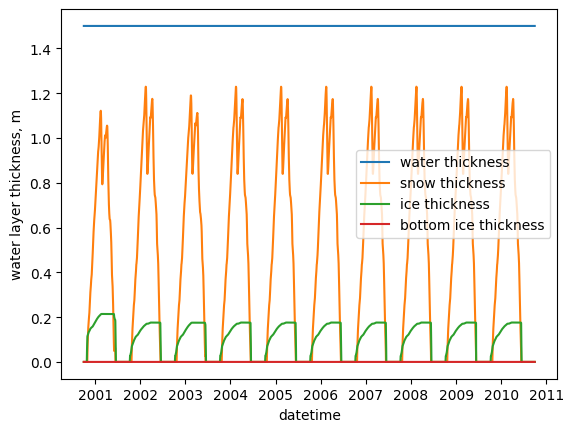

In [120]:
sns.lineplot(data=layers_burned, x='datetime', y='water layer thickness, m', label='water thickness')
#sns.lineplot(data=layers_burned, x='datetime', y='mean_mixed_layer_thickness', label='mixed layer thickness')
#sns.lineplot(data=layers_burned, x='datetime', y='mean_lower_layer_thickness', label='lower layer thickness')
sns.lineplot(data=layers_burned, x='datetime', y='snow layer thickness,  m', label='snow thickness')
sns.lineplot(data=layers_burned, x='datetime', y='ice layer thickness,   m', label='ice thickness')
sns.lineplot(data=layers_burned, x='datetime', y='bottom ice thickness,  m', label='bottom ice thickness')

In [121]:
layers_burned[(layers_burned['year']==2010) & (layers_burned['month']==1) & (layers_burned['day']==1)]

,year,month,day,hour,integration_time,"water layer thickness, m","W mixed layer thickness, m","E mixed layer thickness, m","S mixed layer thickness, m","N mixed layer thickness, m",...,"S lower layer thickness, m","N lower layer thickness, m","ice layer thickness, m","snow layer thickness, m","bottom ice thickness, m","reservoir volume, m**3","volume deficit (accumulated), m**3",datetime,mean_mixed_layer_thickness,mean_lower_layer_thickness
3378,2010,1,1,12.0,81096.0,1.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1408,0.7934,0.0,719.6,0.0,2010-01-01,0.0,0.0


<AxesSubplot: xlabel='datetime', ylabel='t_water'>

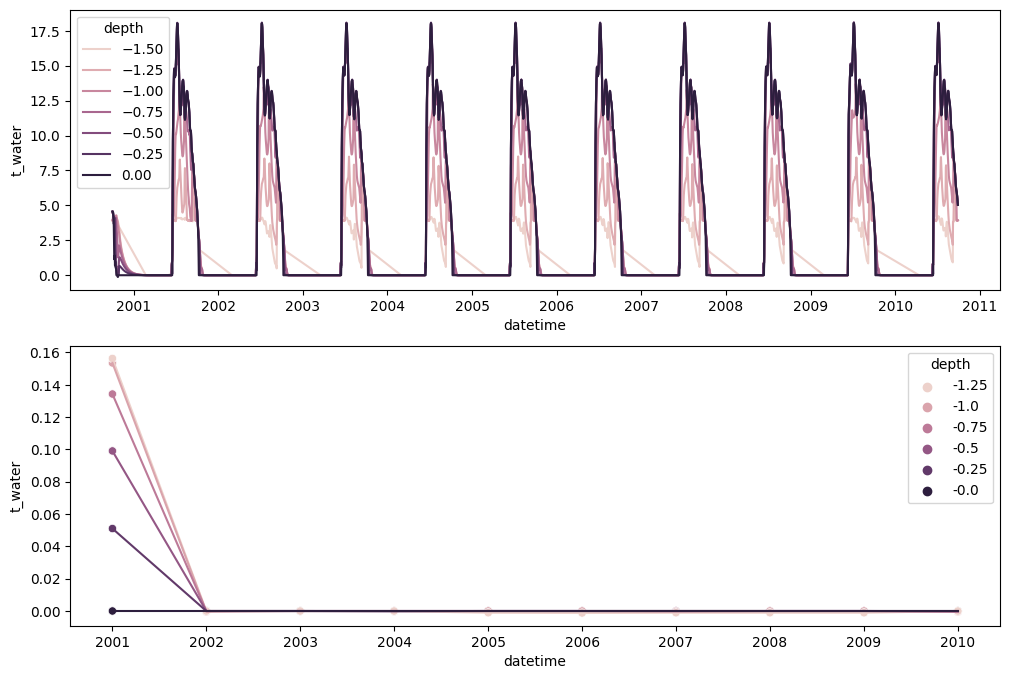

In [123]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=twater_burned[twater_burned['t_water']!=-999], x='datetime', y='t_water', hue = 'depth', ax=axes[0])
sns.lineplot(data=twater_burned[(twater_burned['t_water']!=-999) & (twater_burned['month']==1) & (twater_burned['day']==1)], 
             x='datetime', y='t_water', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=twater_burned[(twater_burned['t_water']!=-999) & (twater_burned['month']==1) & (twater_burned['day']==1)], 
             x='datetime', y='t_water', hue = 'depth', ax=axes[1])

In [125]:
twater_burned[(twater_burned['t_water']!=-999) & (twater_burned['year']==2010) & (twater_burned['month']==1) & (twater_burned['day']==1)]

,year,month,day,hour,integration_time,depth,t_water,datetime
23646,2010,1,1,12.0,3379.0,-0.00,-1.052657e-11,2010-01-01
23647,2010,1,1,12.0,3379.0,-0.25,-3.170849e-06,2010-01-01
23648,2010,1,1,12.0,3379.0,-0.50,-1.725308e-04,2010-01-01
23649,2010,1,1,12.0,3379.0,-0.75,-3.247976e-04,2010-01-01
23650,2010,1,1,12.0,3379.0,-1.00,-4.612308e-04,2010-01-01
23651,2010,1,1,12.0,3379.0,-1.25,-2.335013e-05,2010-01-01


<AxesSubplot: xlabel='datetime', ylabel='sal_water'>

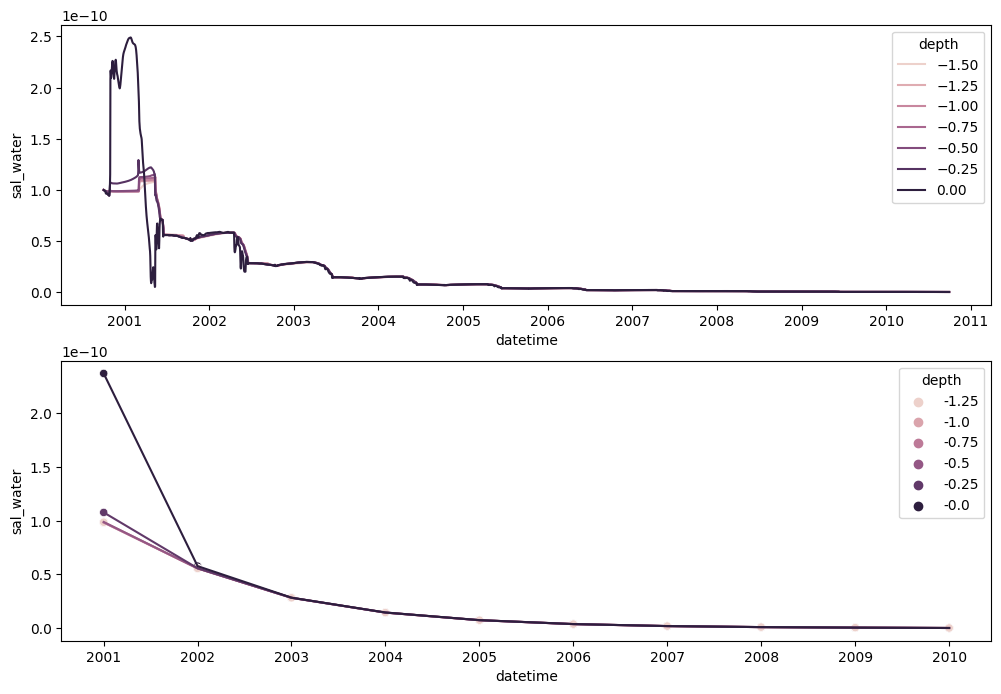

In [124]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=sal_water_burned[sal_water_burned['sal_water']!=-999], x='datetime', y='sal_water', hue = 'depth', ax=axes[0])
sns.lineplot(data=sal_water_burned[(sal_water_burned['sal_water']!=-999) & (sal_water_burned['month']==1) & (sal_water_burned['day']==1)], 
             x='datetime', y='sal_water', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=sal_water_burned[(sal_water_burned['sal_water']!=-999) & (sal_water_burned['month']==1) & (sal_water_burned['day']==1)], 
             x='datetime', y='sal_water', hue = 'depth', ax=axes[1])

In [107]:
sal_water_burned[(sal_water_burned['sal_water']!=-999) & (sal_water_burned['year']==2010) & (sal_water_burned['month']==1) & (sal_water_burned['day']==1)]

,year,month,day,hour,integration_time,depth,sal_water,datetime
23646,2010,1,1,12.0,3379.0,-0.00,1.578197e-13,2010-01-01
23647,2010,1,1,12.0,3379.0,-0.25,1.532768e-13,2010-01-01
23648,2010,1,1,12.0,3379.0,-0.50,1.530331e-13,2010-01-01
23649,2010,1,1,12.0,3379.0,-0.75,1.530150e-13,2010-01-01
23650,2010,1,1,12.0,3379.0,-1.00,1.530014e-13,2010-01-01
23651,2010,1,1,12.0,3379.0,-1.25,1.529949e-13,2010-01-01


<AxesSubplot: xlabel='datetime', ylabel='t_soil'>

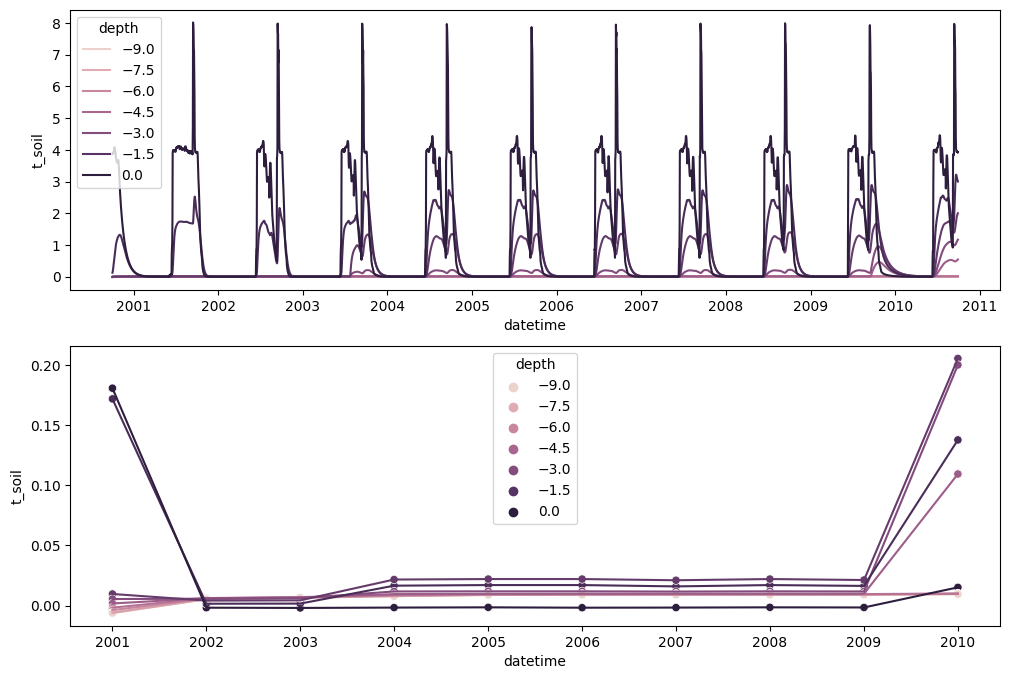

In [106]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=tsoil_burned[tsoil_burned['t_soil']!=-999], x='datetime', y='t_soil', hue = 'depth', ax=axes[0])
sns.lineplot(data=tsoil_burned[(tsoil_burned['t_soil']!=-999) & (tsoil_burned['month']==1) & (tsoil_burned['day']==1)], 
             x='datetime', y='t_soil', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=tsoil_burned[(tsoil_burned['t_soil']!=-999) & (tsoil_burned['month']==1) & (tsoil_burned['day']==1)], 
             x='datetime', y='t_soil', hue = 'depth', ax=axes[1])

In [113]:
tsoil_burned[(tsoil_burned['t_soil']!=-999) & (tsoil_burned['year']==2010) & (tsoil_burned['month']==1) & (tsoil_burned['day']==1)]

,year,month,day,hour,integration_time,depth,t_soil,datetime
37158,2010,1,1,12.0,3379.0,-0.0,0.0151,2010-01-01
37159,2010,1,1,12.0,3379.0,-1.0,0.1376,2010-01-01
37160,2010,1,1,12.0,3379.0,-2.0,0.2053,2010-01-01
37161,2010,1,1,12.0,3379.0,-3.0,0.1999,2010-01-01
37162,2010,1,1,12.0,3379.0,-4.0,0.1093,2010-01-01
37163,2010,1,1,12.0,3379.0,-5.0,0.0100,2010-01-01
37164,2010,1,1,12.0,3379.0,-6.0,0.0098,2010-01-01
37165,2010,1,1,12.0,3379.0,-7.0,0.0096,2010-01-01
37166,2010,1,1,12.0,3379.0,-8.0,0.0095,2010-01-01
37167,2010,1,1,12.0,3379.0,-9.0,0.0095,2010-01-01


# Unburned Plots

<AxesSubplot: xlabel='datetime', ylabel='water layer thickness, m'>

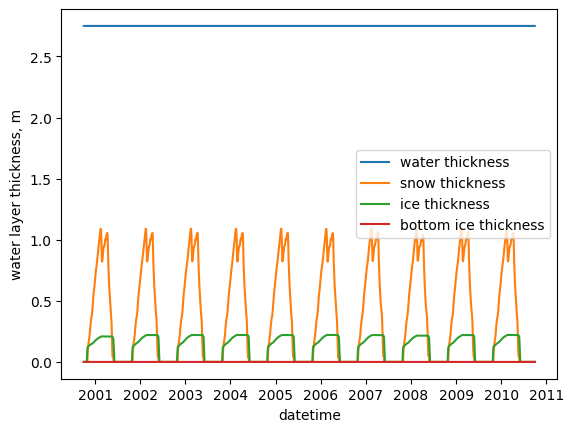

In [126]:
sns.lineplot(data=layers_unburned, x='datetime', y='water layer thickness, m', label='water thickness')
#sns.lineplot(data=layers_burned, x='datetime', y='mean_mixed_layer_thickness', label='mixed layer thickness')
#sns.lineplot(data=layers_burned, x='datetime', y='mean_lower_layer_thickness', label='lower layer thickness')
sns.lineplot(data=layers_unburned, x='datetime', y='snow layer thickness,  m', label='snow thickness')
sns.lineplot(data=layers_unburned, x='datetime', y='ice layer thickness,   m', label='ice thickness')
sns.lineplot(data=layers_unburned, x='datetime', y='bottom ice thickness,  m', label='bottom ice thickness')

In [128]:
layers_unburned[(layers_unburned['year']==2010) & (layers_unburned['month']==1) & (layers_unburned['day']==1)]

,year,month,day,hour,integration_time,"water layer thickness, m","W mixed layer thickness, m","E mixed layer thickness, m","S mixed layer thickness, m","N mixed layer thickness, m",...,"S lower layer thickness, m","N lower layer thickness, m","ice layer thickness, m","snow layer thickness, m","bottom ice thickness, m","reservoir volume, m**3","volume deficit (accumulated), m**3",datetime,mean_mixed_layer_thickness,mean_lower_layer_thickness
3378,2010,1,1,12.0,81096.0,2.75,0.0,0.0,0.0,0.0,...,0.0,0.0,0.184,0.6993,0.0,5916.0,0.0,2010-01-01,0.0,0.0


<AxesSubplot: xlabel='datetime', ylabel='t_water'>

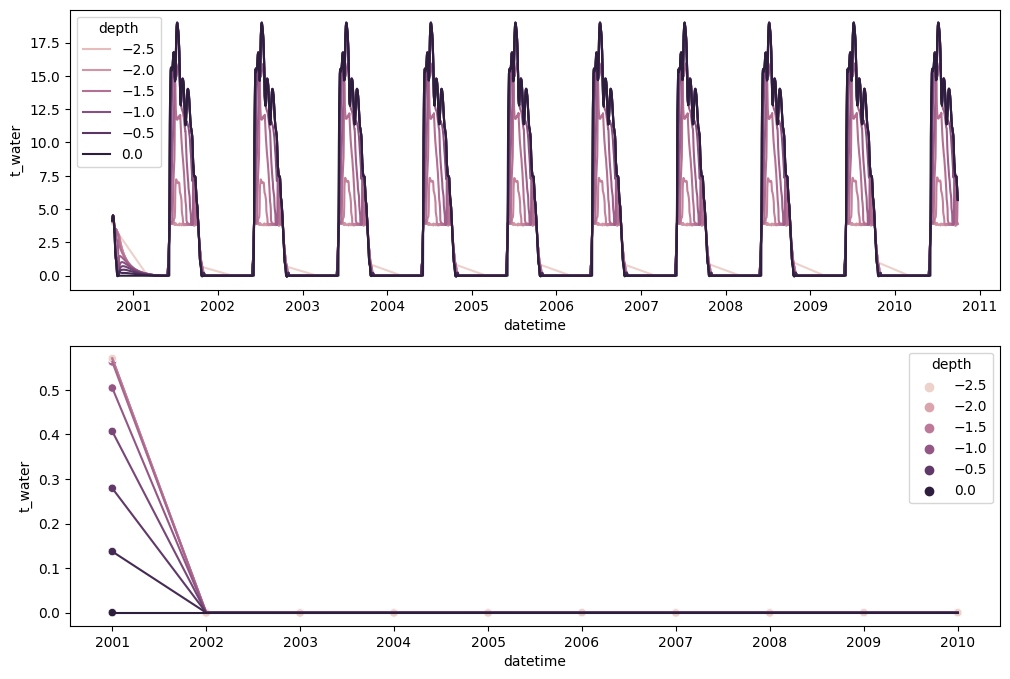

In [129]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=twater_unburned[twater_unburned['t_water']!=-999], x='datetime', y='t_water', hue = 'depth', ax=axes[0])
sns.lineplot(data=twater_unburned[(twater_unburned['t_water']!=-999) & (twater_unburned['month']==1) & (twater_unburned['day']==1)], 
             x='datetime', y='t_water', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=twater_unburned[(twater_unburned['t_water']!=-999) & (twater_unburned['month']==1) & (twater_unburned['day']==1)], 
             x='datetime', y='t_water', hue = 'depth', ax=axes[1])

<AxesSubplot: xlabel='datetime', ylabel='t_water'>

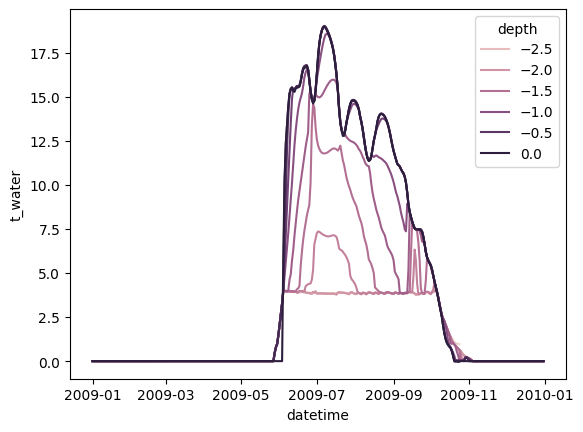

In [136]:
sns.lineplot(data=twater_unburned[(twater_unburned['t_water']!=-999)&(twater_unburned['year']==2009)], x='datetime', y='t_water', hue = 'depth')

In [134]:
twater_unburned[(twater_unburned['t_water']!=-999) & (twater_unburned['year']==2010) & (twater_unburned['month']==1) & (twater_unburned['day']==1)]

,year,month,day,hour,integration_time,depth,t_water,datetime
40536,2010,1,1,12.0,3379.0,-0.00,-5.552474e-10,2010-01-01
40537,2010,1,1,12.0,3379.0,-0.25,-1.833034e-06,2010-01-01
40538,2010,1,1,12.0,3379.0,-0.50,-1.313352e-06,2010-01-01
40539,2010,1,1,12.0,3379.0,-0.75,-7.397400e-07,2010-01-01
40540,2010,1,1,12.0,3379.0,-1.00,-9.470368e-07,2010-01-01
40541,2010,1,1,12.0,3379.0,-1.25,-1.640321e-06,2010-01-01
40542,2010,1,1,12.0,3379.0,-1.50,-1.786935e-06,2010-01-01
40543,2010,1,1,12.0,3379.0,-1.75,-1.975052e-06,2010-01-01
40544,2010,1,1,12.0,3379.0,-2.00,-3.252701e-06,2010-01-01
40545,2010,1,1,12.0,3379.0,-2.25,-9.118314e-06,2010-01-01


<AxesSubplot: xlabel='datetime', ylabel='sal_water'>

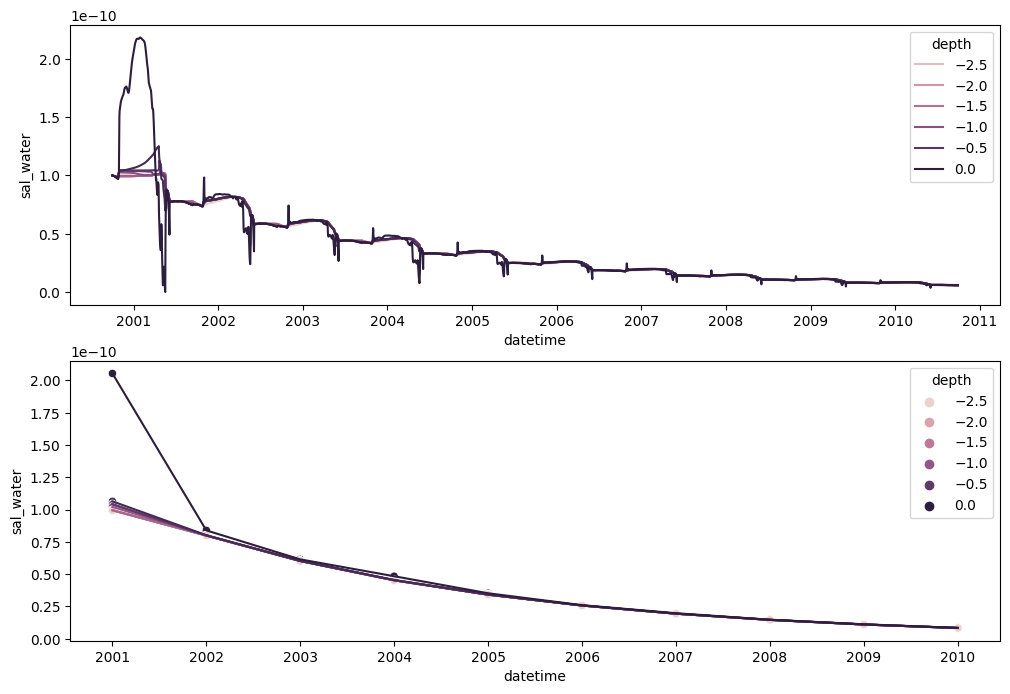

In [137]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=sal_water_unburned[sal_water_unburned['sal_water']!=-999], x='datetime', y='sal_water', hue = 'depth', ax=axes[0])
sns.lineplot(data=sal_water_unburned[(sal_water_unburned['sal_water']!=-999) & (sal_water_unburned['month']==1) & (sal_water_unburned['day']==1)], 
             x='datetime', y='sal_water', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=sal_water_unburned[(sal_water_unburned['sal_water']!=-999) & (sal_water_unburned['month']==1) & (sal_water_unburned['day']==1)], 
             x='datetime', y='sal_water', hue = 'depth', ax=axes[1])

In [138]:
sal_water_unburned[(sal_water_unburned['sal_water']!=-999) & (sal_water_unburned['year']==2010) & (sal_water_unburned['month']==1) & (sal_water_unburned['day']==1)]

,year,month,day,hour,integration_time,depth,sal_water,datetime
40536,2010,1,1,12.0,3379.0,-0.00,8.324547e-12,2010-01-01
40537,2010,1,1,12.0,3379.0,-0.25,8.267061e-12,2010-01-01
40538,2010,1,1,12.0,3379.0,-0.50,8.264832e-12,2010-01-01
40539,2010,1,1,12.0,3379.0,-0.75,8.263521e-12,2010-01-01
40540,2010,1,1,12.0,3379.0,-1.00,8.263165e-12,2010-01-01
40541,2010,1,1,12.0,3379.0,-1.25,8.263052e-12,2010-01-01
40542,2010,1,1,12.0,3379.0,-1.50,8.262946e-12,2010-01-01
40543,2010,1,1,12.0,3379.0,-1.75,8.262881e-12,2010-01-01
40544,2010,1,1,12.0,3379.0,-2.00,8.262841e-12,2010-01-01
40545,2010,1,1,12.0,3379.0,-2.25,8.262817e-12,2010-01-01


<AxesSubplot: xlabel='datetime', ylabel='t_soil'>

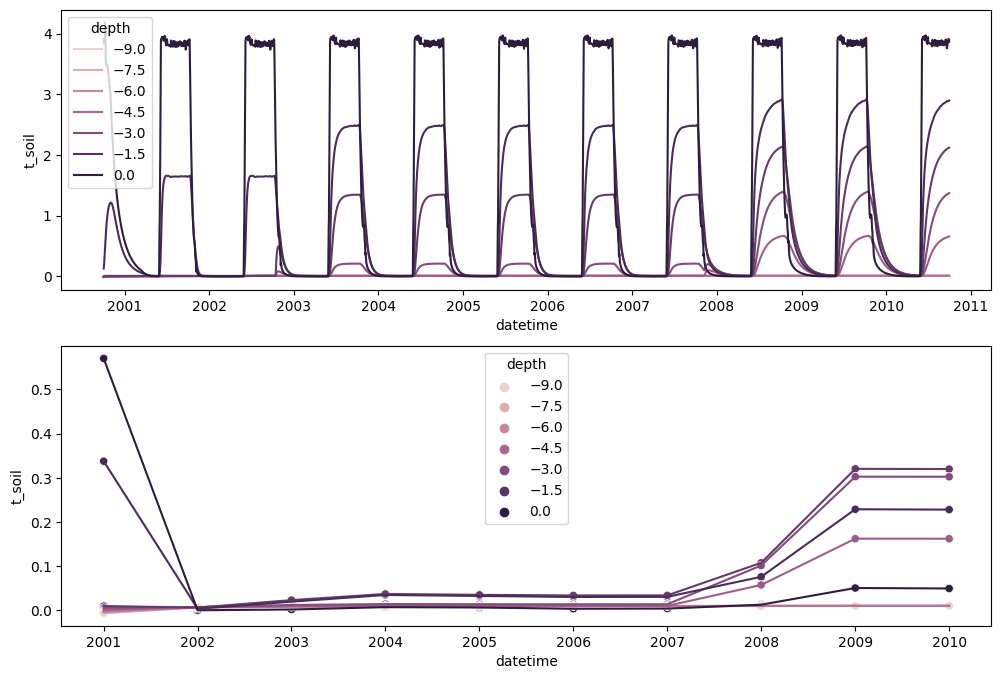

In [141]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=tsoil_unburned[tsoil_unburned['t_soil']!=-999], x='datetime', y='t_soil', hue = 'depth', ax=axes[0])
sns.lineplot(data=tsoil_unburned[(tsoil_unburned['t_soil']!=-999) & (tsoil_unburned['month']==1) & (tsoil_unburned['day']==1)], 
             x='datetime', y='t_soil', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=tsoil_unburned[(tsoil_unburned['t_soil']!=-999) & (tsoil_unburned['month']==1) & (tsoil_unburned['day']==1)], 
             x='datetime', y='t_soil', hue = 'depth', ax=axes[1])

In [142]:
tsoil_unburned[(tsoil_unburned['t_soil']!=-999) & (tsoil_unburned['year']==2010) & (tsoil_unburned['month']==1) & (tsoil_unburned['day']==1)]

,year,month,day,hour,integration_time,depth,t_soil,datetime
37158,2010,1,1,12.0,3379.0,-0.0,0.0493,2010-01-01
37159,2010,1,1,12.0,3379.0,-1.0,0.2279,2010-01-01
37160,2010,1,1,12.0,3379.0,-2.0,0.3198,2010-01-01
37161,2010,1,1,12.0,3379.0,-3.0,0.3023,2010-01-01
37162,2010,1,1,12.0,3379.0,-4.0,0.1620,2010-01-01
37163,2010,1,1,12.0,3379.0,-5.0,0.0100,2010-01-01
37164,2010,1,1,12.0,3379.0,-6.0,0.0100,2010-01-01
37165,2010,1,1,12.0,3379.0,-7.0,0.0100,2010-01-01
37166,2010,1,1,12.0,3379.0,-8.0,0.0100,2010-01-01
37167,2010,1,1,12.0,3379.0,-9.0,0.0100,2010-01-01


In [ ]:
t_fluxes=pd.read_csv(t_fluxes_path, delimiter=r"\s+", skiprows=27, index_col=None, header=None)
col_names=['year',
           'month',
           'day',
        'hour',
 'int_time',
 'surface temperature, C',
 'water skin temperature, C',
 'water surface temperature, C',
 'mean temperature of water coloumn, C',
 'maximal temperature in the water coloumn, C',
 'zero-dimensional model temperature, C',
 'upper ice surface temperature, C',
 'upper snow surface temperature, C',
 'sensible heat flux,    W/m**2',
 'latent heat flux,      W/m**2',
 'downward heat flux at the upper lake surface, W/m**2',
 'downward heat flux at the lake bottom, W/m**2',
 'friction velocity at the surface (waterside), m/s',
 'friction velocity at the bottom, m/s',
 'wind work at the water surface, W/m**2',
 'albedo of the lake-atmosphere interface, n/d',
 'shortwave radiation penetrated below surface, W/m**2',
 'significant wave height, m',
 'bottom ice salinity, kg/kg',
 'discharge in x direction, m**3/s',
 'discharge in y direction, m**3/s',
 'top soil columns temperature1, m',
 'top soil columns temperature1, m',
 'top soil columns temperature1, m',
 'top soil columns temperature1, m',
 'top soil columns temperature1, m']
t_fluxes.columns=col_names

t_fluxes['datetime'] = pd.to_datetime({'Year': t_fluxes['year'], 'Month': t_fluxes['month'], 'Day':t_fluxes['day']})

(array([10957., 11323., 11688., 12053., 12418., 12784., 13149., 13514.,
        13879., 14245., 14610., 14975.]),
 [Text(10957.0, 0, '2000'),
  Text(11323.0, 0, '2001'),
  Text(11688.0, 0, '2002'),
  Text(12053.0, 0, '2003'),
  Text(12418.0, 0, '2004'),
  Text(12784.0, 0, '2005'),
  Text(13149.0, 0, '2006'),
  Text(13514.0, 0, '2007'),
  Text(13879.0, 0, '2008'),
  Text(14245.0, 0, '2009'),
  Text(14610.0, 0, '2010'),
  Text(14975.0, 0, '2011')])

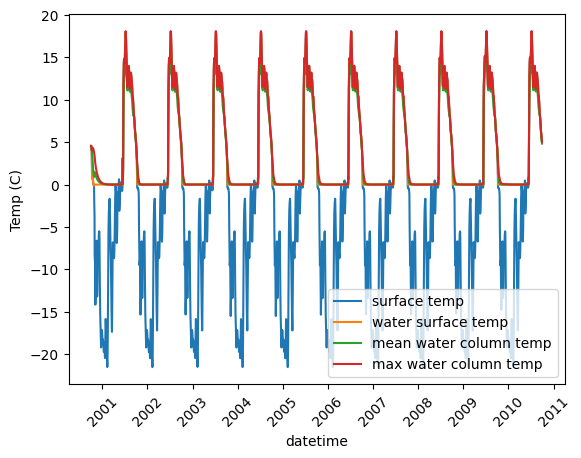

In [60]:
sns.lineplot(data=t_fluxes, x='datetime', y='surface temperature, C', label='surface temp')
sns.lineplot(data=t_fluxes, x='datetime', y='water surface temperature, C', label='water surface temp')
sns.lineplot(data=t_fluxes, x='datetime', y='mean temperature of water coloumn, C', label='mean water column temp')
sns.lineplot(data=t_fluxes, x='datetime', y='maximal temperature in the water coloumn, C', label='max water column temp')
plt.ylabel('Temp (C)')
plt.xticks(rotation = 45)

(array([10957., 11323., 11688., 12053., 12418., 12784., 13149., 13514.,
        13879., 14245., 14610., 14975.]),
 [Text(10957.0, 0, '2000'),
  Text(11323.0, 0, '2001'),
  Text(11688.0, 0, '2002'),
  Text(12053.0, 0, '2003'),
  Text(12418.0, 0, '2004'),
  Text(12784.0, 0, '2005'),
  Text(13149.0, 0, '2006'),
  Text(13514.0, 0, '2007'),
  Text(13879.0, 0, '2008'),
  Text(14245.0, 0, '2009'),
  Text(14610.0, 0, '2010'),
  Text(14975.0, 0, '2011')])

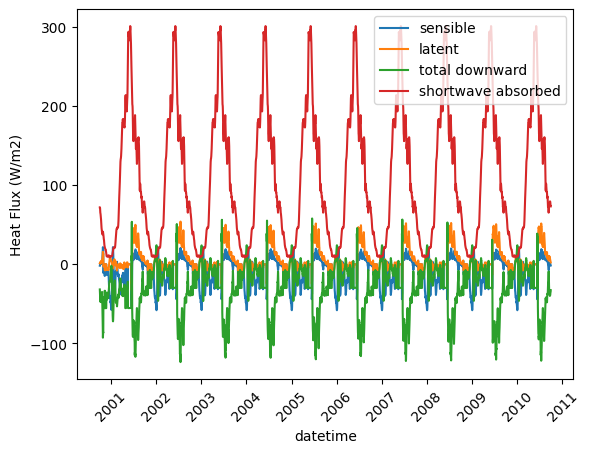

In [61]:

sns.lineplot(data=t_fluxes, x='datetime', y='sensible heat flux,    W/m**2', label='sensible')
sns.lineplot(data=t_fluxes, x='datetime', y='latent heat flux,      W/m**2', label='latent')
sns.lineplot(data=t_fluxes, x='datetime', y='downward heat flux at the upper lake surface, W/m**2', label='total downward')
sns.lineplot(data=t_fluxes, x='datetime', y='shortwave radiation penetrated below surface, W/m**2', label='shortwave absorbed')

plt.ylabel('Heat Flux (W/m2)')
plt.xticks(rotation = 45)

<AxesSubplot: xlabel='datetime', ylabel='albedo of the lake-atmosphere interface, n/d'>

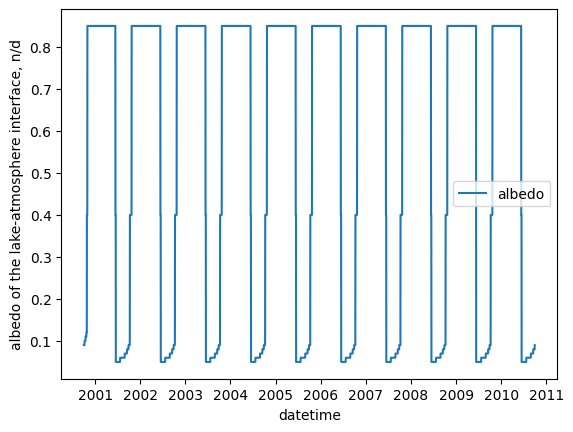

In [62]:

sns.lineplot(data=t_fluxes, x='datetime', y='albedo of the lake-atmosphere interface, n/d', label='albedo')